In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
# !wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

# !unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
# 3
# Set the variables correctly
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 20
epochs = 10
train_dir = '/content/cats_and_dogs/train'
val_dir = '/content/cats_and_dogs/validation'
test_dir = '/content/cats_and_dogs/test'

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=batch_size,
                                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          batch_size=1,
                                                          class_mode=None,
                                                          shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


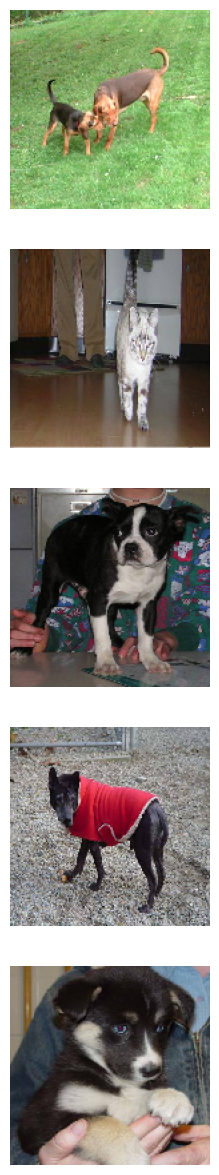

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
# 5
# Recreate the train_image_generator with data augmentation
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')

validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 20
epochs = 10
train_dir = '/content/cats_and_dogs/train'
val_dir = '/content/cats_and_dogs/validation'
test_dir = '/content/cats_and_dogs/test'

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=batch_size,
                                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          batch_size=1,
                                                          class_mode=None,
                                                          shuffle=False)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


Found 2000 images belonging to 2 classes.


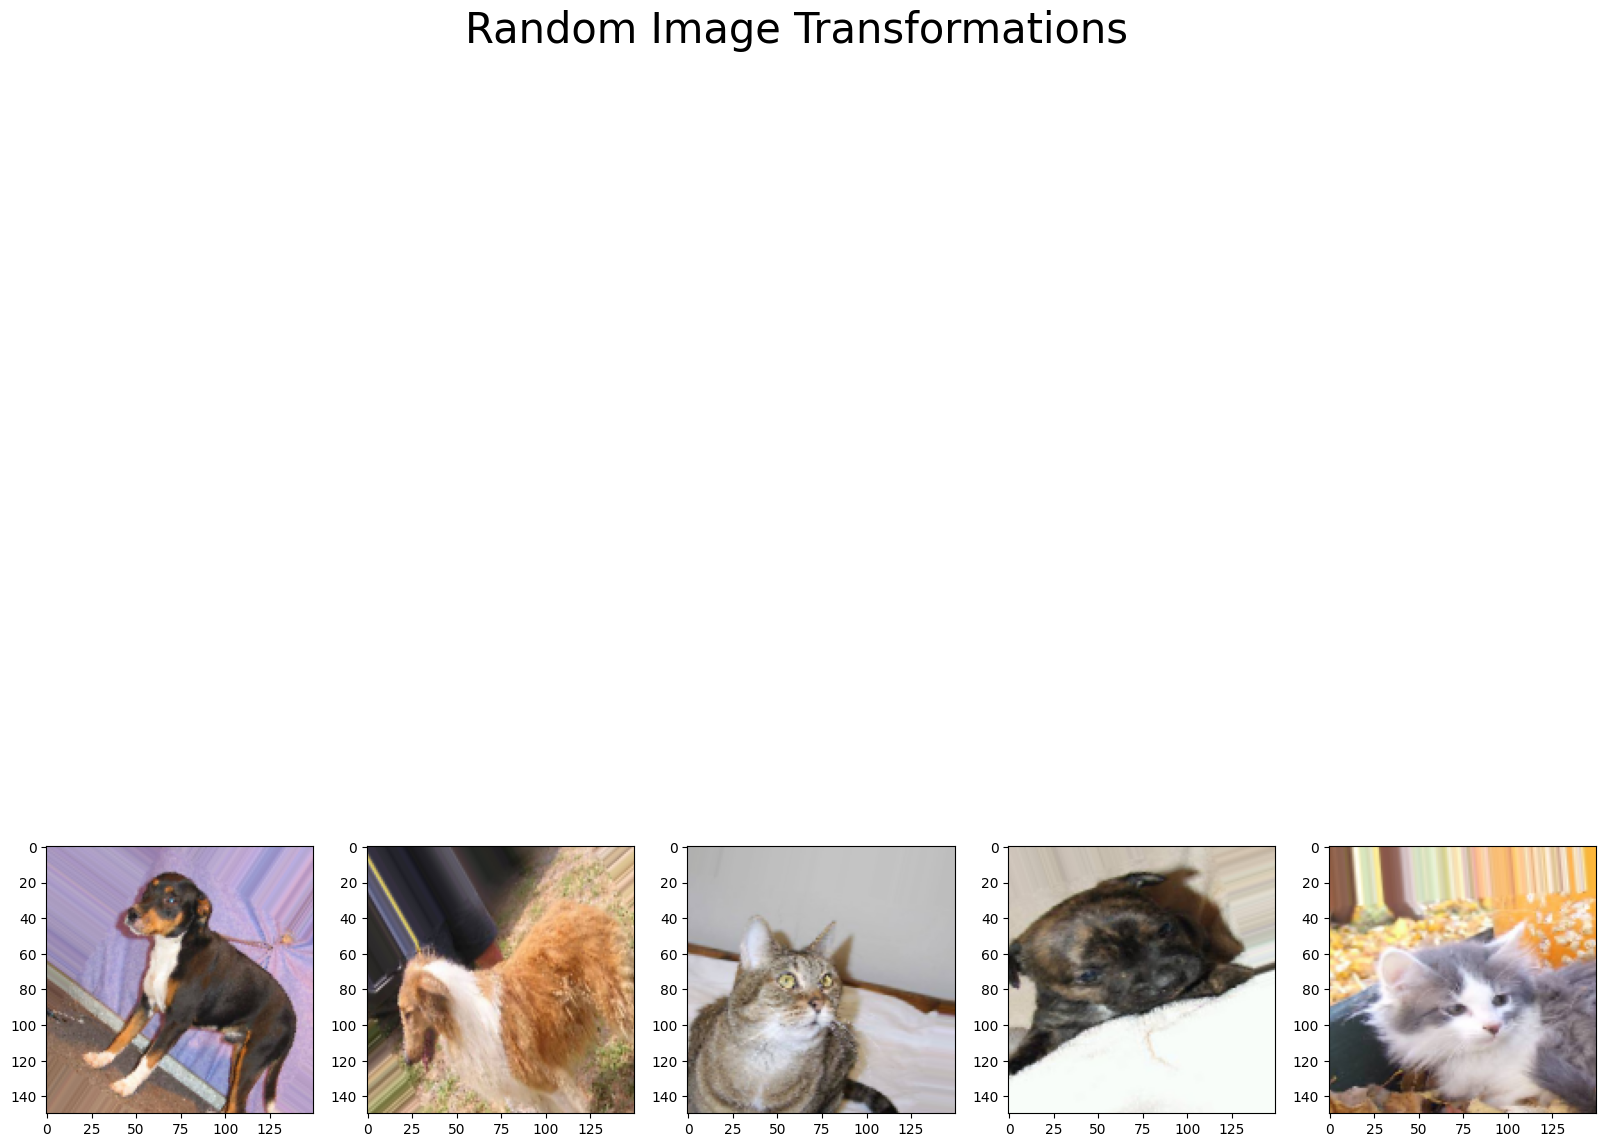

In [6]:
# 6
# Create new train_data_gen with data augmentation
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')

# Plot a single image five different times with different variations
sample_training_images, _ = next(train_data_gen)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
fig.suptitle('Random Image Transformations', fontsize=30)
for i in range(5):
    ax[i].imshow(sample_training_images[i])
plt.show()


In [7]:
# 7
# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Add a MaxPooling2D layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 128 filters, a 3x3 kernel size, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add another MaxPooling2D layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the last Conv2D layer
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a final output layer with a single unit and sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
# 8
# Define the number of steps per epoch and validation steps
train_steps_per_epoch = train_data_gen.n // train_data_gen.batch_size
val_steps_per_epoch = val_data_gen.n // val_data_gen.batch_size

# Train the model using the fit method
history = model.fit(train_data_gen, steps_per_epoch=train_steps_per_epoch, epochs=10,
                    validation_data=val_data_gen, validation_steps=val_steps_per_epoch)


Epoch 1/10
100/100 [==============================] - 29s 228ms/step - loss: 0.7323 - accuracy: 0.5065 - val_loss: 0.6928 - val_accuracy: 0.5560
Epoch 2/10
100/100 [==============================] - 19s 186ms/step - loss: 0.6902 - accuracy: 0.5395 - val_loss: 0.6843 - val_accuracy: 0.5330
Epoch 3/10
100/100 [==============================] - 20s 199ms/step - loss: 0.6904 - accuracy: 0.5515 - val_loss: 0.6807 - val_accuracy: 0.5680
Epoch 4/10
100/100 [==============================] - 20s 197ms/step - loss: 0.6887 - accuracy: 0.5570 - val_loss: 0.6901 - val_accuracy: 0.5100
Epoch 5/10
100/100 [==============================] - 20s 199ms/step - loss: 0.6811 - accuracy: 0.5630 - val_loss: 0.7021 - val_accuracy: 0.5110
Epoch 6/10
100/100 [==============================] - 19s 188ms/step - loss: 0.6737 - accuracy: 0.5835 - val_loss: 0.6786 - val_accuracy: 0.5590
Epoch 7/10
100/100 [==============================] - 19s 189ms/step - loss: 0.6620 - accuracy: 0.6090 - val_loss: 0.6713 - val_ac

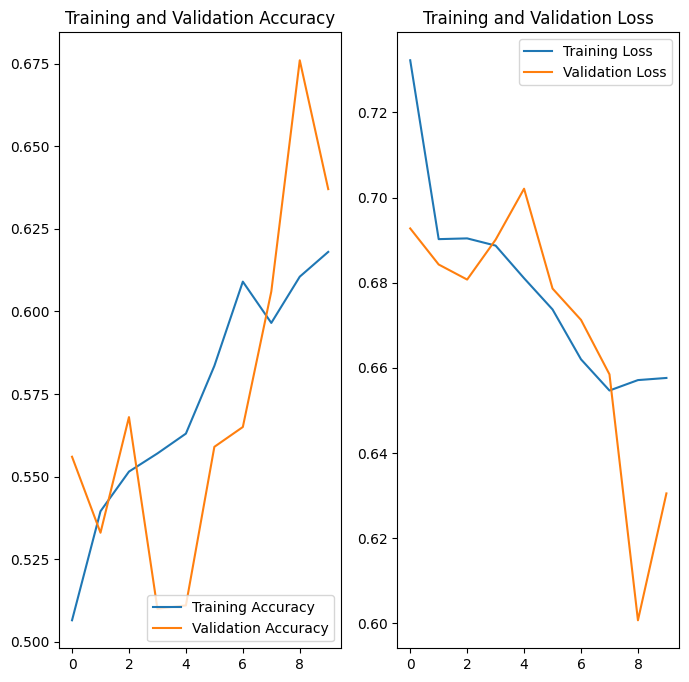

In [9]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Get the probabilities that each test image is a dog or a cat
probabilities = model.predict(val_data_gen)

# # Plot the test images and their corresponding probabilities



50/50 [==============================] - 3s 57ms/step


In [15]:
answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
           1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
           0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
    if np.round(probability) == answer:
        correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 42.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!


In [26]:
# import matplotlib.pyplot as plt

# def plotImages(images_probs):
#     fig, axes = plt.subplots(5, 10, figsize=(20,20))
#     axes = axes.ravel()
#     for i in np.arange(0, len(images_probs)):
#         img, prob = images_probs[i]
#         axes[i].imshow(img)
#         axes[i].set_title("{:.0f}% Dog, {:.0f}% Cat".format(100*prob[0], 100*prob[1]))
#         axes[i].axis('off')
#         plt.subplots_adjust(wspace=0.5)
# images_probs = []
# for batch in val_data_gen:
#     batch_images, batch_labels = batch
#     batch_probs = model.predict(batch_images)
#     for i in range(len(batch_images)):
#         images_probs.append((batch_images[i], batch_probs[i]))


# plotImages(images_probs)
